<a href="https://colab.research.google.com/github/angelaaaateng/ftw_python/blob/main/Logistic_Regressoin_Walkthrough_B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

03 Classification
===
Samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. An example of a classification problem would be handwritten digit recognition, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class.

In [1]:
# IMPORT GENERIC PACKAGES
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting
#sns.set(rc={'figure.figsize':(20,10)})

# Logistic Regression
In statistics, the logistic model is a binary classifier used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick. This can be extended to model several classes of events such as determining whether an image contains a cat, dog, lion, etc.

In [2]:
data_df = pd.read_csv('https://raw.githubusercontent.com/angelaaaateng/ftw_python/main/data/advertising_classification.csv')
data_df.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


### Dataset Description  

We want to predict if the person clicked on the ad based on features such as:  

- daily time spent on site
- area income
- daily internet usage

In [3]:
# write list of features we want to use
features = ["Daily Time Spent on Site", 'Area Income', "Age"]

# Set X
X = data_df[features]
X.head()

,Daily Time Spent on Site,Area Income,Age
0,68.95,61833.90,35
1,80.23,68441.85,31
2,69.47,59785.94,26
3,74.15,54806.18,29
4,68.37,73889.99,35


In [16]:
# write list of features we want to use
features = ["Daily Time Spent on Site", 'Area Income', "Age"]

# Set X
X_temp = data_df[features]


# Convert text to numeric
X = pd.get_dummies(X_temp)
X

,Daily Time Spent on Site,Area Income,Age
0,68.95,61833.90,35
1,80.23,68441.85,31
2,69.47,59785.94,26
3,74.15,54806.18,29
4,68.37,73889.99,35
...,...,...,...
995,72.97,71384.57,30
996,51.30,67782.17,45
997,51.63,42415.72,51
998,55.55,41920.79,19


In [18]:

# Set y
y = data_df["Clicked on Ad"]
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split # split dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [20]:
from sklearn.linear_model import LogisticRegression # linear model for classification

# initialize model
log_reg = LogisticRegression()

# fit model
log_reg.fit(X_train, y_train)

# predictions
y_pred = log_reg.predict(X_test)

In [21]:
# feature importance
log_reg.coef_

array([[-9.21576265e-02, -4.54325301e-05,  2.40258827e-01]])

Classification Accuracy is what we usually mean, when we use the term accuracy. It is the ratio of number of correct predictions to the total number of input samples:

$\begin{equation}
accuracy = \frac{Number\ of\ correct\ predictions}{Total\ number\ of\ predictions\ made}
\end{equation}$


In [22]:
from sklearn.metrics import accuracy_score
# metrics (accuracy)
acc = log_reg.score(X_test, y_test)
print("mean accuracy: ",acc)
print("prediction accuracy: ",accuracy_score(y_pred, y_test))

mean accuracy:  0.8939393939393939
prediction accuracy:  0.8939393939393939


### What is a Confusion Matrix?  
A confusion matrix is a summary of prediction results on a classification problem.  

The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.  

The confusion matrix shows the ways in which your classification model is confused when it makes predictions.  

It gives you insight not only into the errors being made by your classifier but more importantly the types of errors that are being made.  

It is this breakdown that overcomes the limitation of using classification accuracy alone.  

In [23]:
from sklearn.metrics import confusion_matrix

# confusion matrix
cf = confusion_matrix(y_test, y_pred)
cf

array([[156,   6],
       [ 29, 139]])

<Axes: >

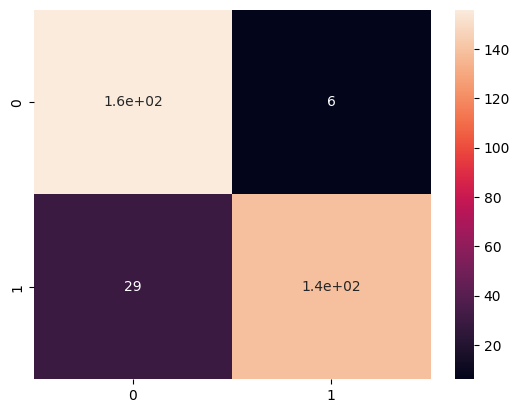

In [24]:
# heatmap of confusion matrix
sns.heatmap(cf, annot = True)

### Precision
How many from the predicted results are relevant?

$\begin{equation}
precision =  \frac{True Positive}{True Positive + False Positive}
\end{equation}$



In [25]:
from sklearn.metrics import precision_score
precision_score(y_test,y_pred)

0.9586206896551724

### Recall
How many relevant items were selected?

$\begin{equation}
recall =  \frac{True Positive}{True Positive + False Negative}
\end{equation}$



In [12]:
from sklearn.metrics import recall_score
recall_score(y_test,y_pred)

0.8273809523809523

### ROC Curve

Receiver Operating Characteristic (ROC) Curve is a plot of the true
positive rate against the false positive rate. It shows the tradeoff
between sensitivity (true positive rate) and specificity (true negative rate).

Tells how capable is the model in distinguishing between classes.

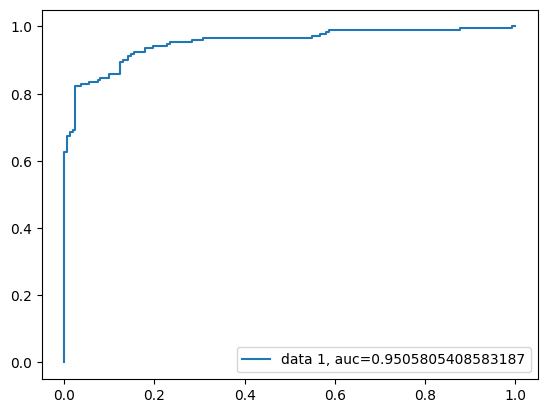

In [13]:
from sklearn.metrics import roc_curve,roc_auc_score
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Why is class imbalance a big problem for classifiers?
Don't forget that we stil need to take into account what makes a 'good' model. (making a good model, is what makes a good data scientist!)

# Let's try some more classifiers

accuracy:  0.8848484848484849
confusion matrix:  [[147  15]
 [ 23 145]]
precision:  0.90625
recall:  0.8630952380952381


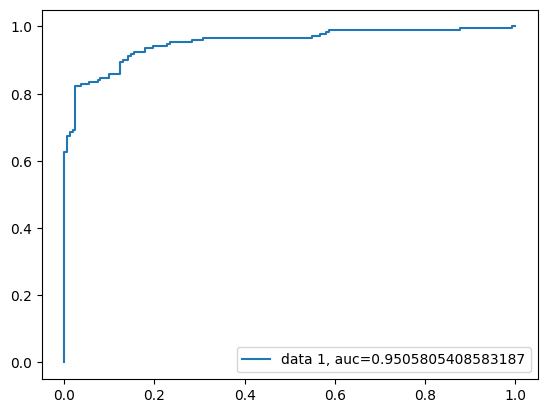

In [14]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print("accuracy: ",accuracy_score(y_test, y_pred))
print("confusion matrix: ",confusion_matrix(y_test, y_pred))
print("precision: ",precision_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred))

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

accuracy:  0.9242424242424242
confusion matrix:  [[153   9]
 [ 16 152]]
precision:  0.9440993788819876
recall:  0.9047619047619048


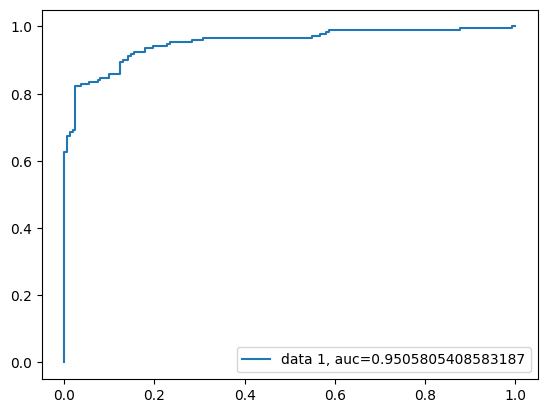

In [15]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("accuracy: ",accuracy_score(y_test, y_pred))
print("confusion matrix: ",confusion_matrix(y_test, y_pred))
print("precision: ",precision_score(y_test,y_pred))
print("recall: ",recall_score(y_test,y_pred))

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Multiclass  vs Multilabel classification
- Multiclass classification means a classification task with more than two classes; e.g., classify a set of images of fruits which may be oranges, apples, or pears. Multiclass classification makes the assumption that each sample is assigned to one and only one label: a fruit can be either an apple or a pear but not both at the same time.
- Multilabel classification assigns to each sample a set of target labels. This can be thought as predicting properties of a data-point that are not mutually exclusive, such as topics that are relevant for a document. A text might be about any of religion, politics, finance or education at the same time or none of these.